**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job! The project is accepted. Good luck on the next sprint!

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

## Project Instructions

1. Load the data.
2. Preprocess the data, if required.
3. Conduct an EDA and make your conclusion on the class imbalance.
4. Preprocess the data for modeling.
5. Train at least three different models for the given train dataset.
6. Test the models for the given test dataset.
7. Compose a few of your own reviews and classify them with all the models.
8. Check for differences between the testing results of models in the above two points. Try to explain them.
9. Present your findings.

Important! The project template already contains some code snippets for your convenience, so you can use them if you'd like. If you want to start right away from a clean sheet, just remove all those code snippets. Here's the list of code snippets:

* A bit of EDA with some plots
* `evaluate_model()`
    * a routine to evaluate a classification model which conforms to the scikit-learn predict interface
* `BERT_text_to_embeddings()`
     * a routing to convert a list of texts into embedding with BERT

The main job to build and evaluate models is your own.
As you can see from the project template, we suggest trying classification models based on logistic regression and gradient boosting, but feel free to try other methods. You can mess around with the project template's structure as long as the project's instructions are completed.
You don't have to use BERT for the project because it is very demanding for computational power and will be very slow on the CPU for the complete dataset. Because of this, BERT usually needs to be executed on GPU for adequate performance. However, you are more than welcome to try and include BERT in the project for a part of the dataset. If you want to do this, we suggest doing so locally and only taking a couple hundred of objects per each part of the (train/test) dataset to avoid waiting too long. Make sure to indicate your use of BERT in the first cell (the header of your project).

## Data Description
The data is stored in the `imdb_reviews.tsv` file. 

*The data was provided by Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).*

Here's the description of the selected fields:

* `review`: the review text
* `pos`: the target, '0' for negative and '1' for positive
* `ds_part`: 'train'/'test' for the train/test part of dataset, correspondingly

There are other fields in the dataset. Feel free to explore them if you'd like.

## Project Evaluation
We’ve put together the evaluation criteria for the project. Read them carefully before moving on to the task:

* The text data has been loaded and pre-processed for vectorization.
* The text data has been transformed to vectors.
* The models have been defined, trained, and tested.
* The metric's threshold has been reached.
* All the code cells are arranged in the order of their execution.
* All the code cells can be executed without errors.
* You have made conclusions.

Our reviewers will also look at the overall quality of your project:

* Did you stick to the project structure?
* Did you keep your code neat?
* Have you managed to avoid code duplication?
* What are your findings?

You have your takeaway sheets and chapter summaries, so you're ready to proceed to the project.
Good luck!

## Initialization

In [54]:
import math
import re 

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [56]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [57]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

### Table Head

In [58]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


### Info

In [59]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
tconst             47331 non-null object
title_type         47331 non-null object
primary_title      47331 non-null object
original_title     47331 non-null object
start_year         47331 non-null int64
end_year           47331 non-null object
runtime_minutes    47331 non-null object
is_adult           47331 non-null int64
genres             47331 non-null object
average_rating     47329 non-null float64
votes              47329 non-null Int64
review             47331 non-null object
rating             47331 non-null int64
sp                 47331 non-null object
pos                47331 non-null int64
ds_part            47331 non-null object
idx                47331 non-null int64
dtypes: Int64(1), float64(1), int64(5), object(10)
memory usage: 6.2+ MB


### Description

In [60]:
df_reviews.describe(include='all')

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
count,47331,47331,47331,47331,47331.000000,47331,47331,47331.000000,47331,47329.000000,4.732900e+04,47331,47331.000000,47331,47331.000000,47331,47331.000000
unique,6648,10,6555,6562,NaN,60,249,NaN,585,NaN,NaN,47240,NaN,2,NaN,2,NaN
top,tt0149151,movie,The Sentinel,The Sentinel,NaN,\N,90,NaN,Drama,NaN,NaN,Loved today's show!!! It was a variety and not...,NaN,neg,NaN,train,NaN
freq,30,36861,60,60,NaN,45052,2442,NaN,3392,NaN,NaN,5,NaN,23715,NaN,23796,NaN
mean,NaN,NaN,NaN,NaN,1989.631235,NaN,NaN,0.001732,NaN,5.998278,2.556292e+04,NaN,5.484608,NaN,0.498954,NaN,6279.697999
std,NaN,NaN,NaN,NaN,19.600364,NaN,NaN,0.041587,NaN,1.494289,8.367004e+04,NaN,3.473109,NaN,0.500004,NaN,3605.702545
min,NaN,NaN,NaN,NaN,1894.000000,NaN,NaN,0.000000,NaN,1.400000,9.000000e+00,NaN,1.000000,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,1982.000000,NaN,NaN,0.000000,NaN,5.100000,8.270000e+02,NaN,2.000000,NaN,0.000000,NaN,3162.000000
50%,NaN,NaN,NaN,NaN,1998.000000,NaN,NaN,0.000000,NaN,6.300000,3.197000e+03,NaN,4.000000,NaN,0.000000,NaN,6299.000000
75%,NaN,NaN,NaN,NaN,2004.000000,NaN,NaN,0.000000,NaN,7.100000,1.397400e+04,NaN,9.000000,NaN,1.000000,NaN,9412.000000


### Duplicates

In [61]:
df_reviews.duplicated().sum()

0

### Missing Values

In [62]:
df_reviews.isnull().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

We have here only few missing values and none of them is in the important columns, so we'll ignore them.

### Conclusion
In this section, we:
* loaded the data
* looked into the data
* checked the data information
* checked the data description
* checked for duplicates
* checked for missing values

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Very good! The data was loaded and inspected!
	  
</div>

## EDA

Let's check the number of movies and reviews over years.

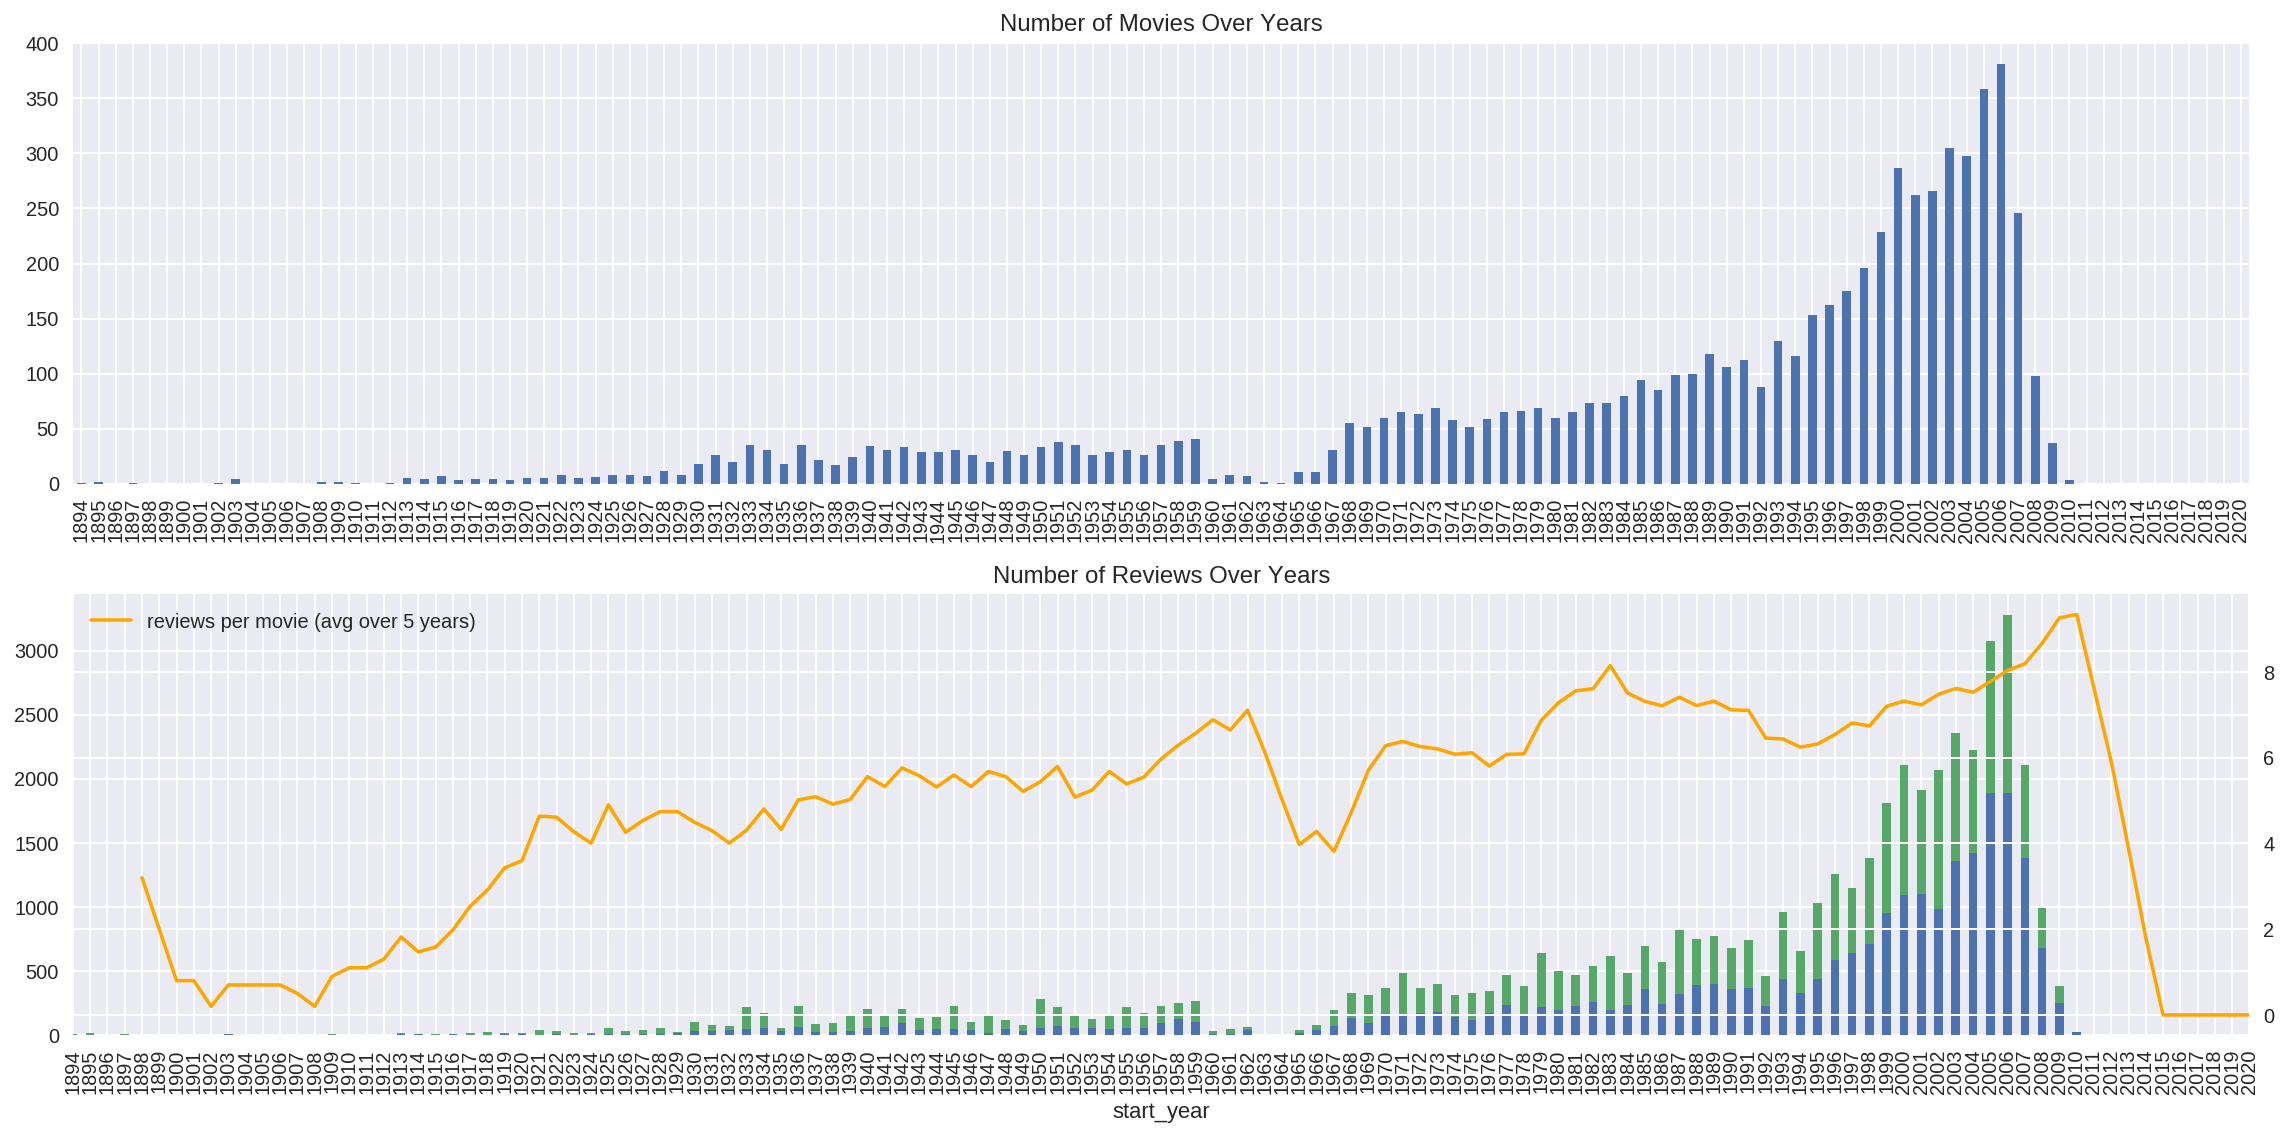

In [63]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

The numbers of movies and reviews are increasing over the years.

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

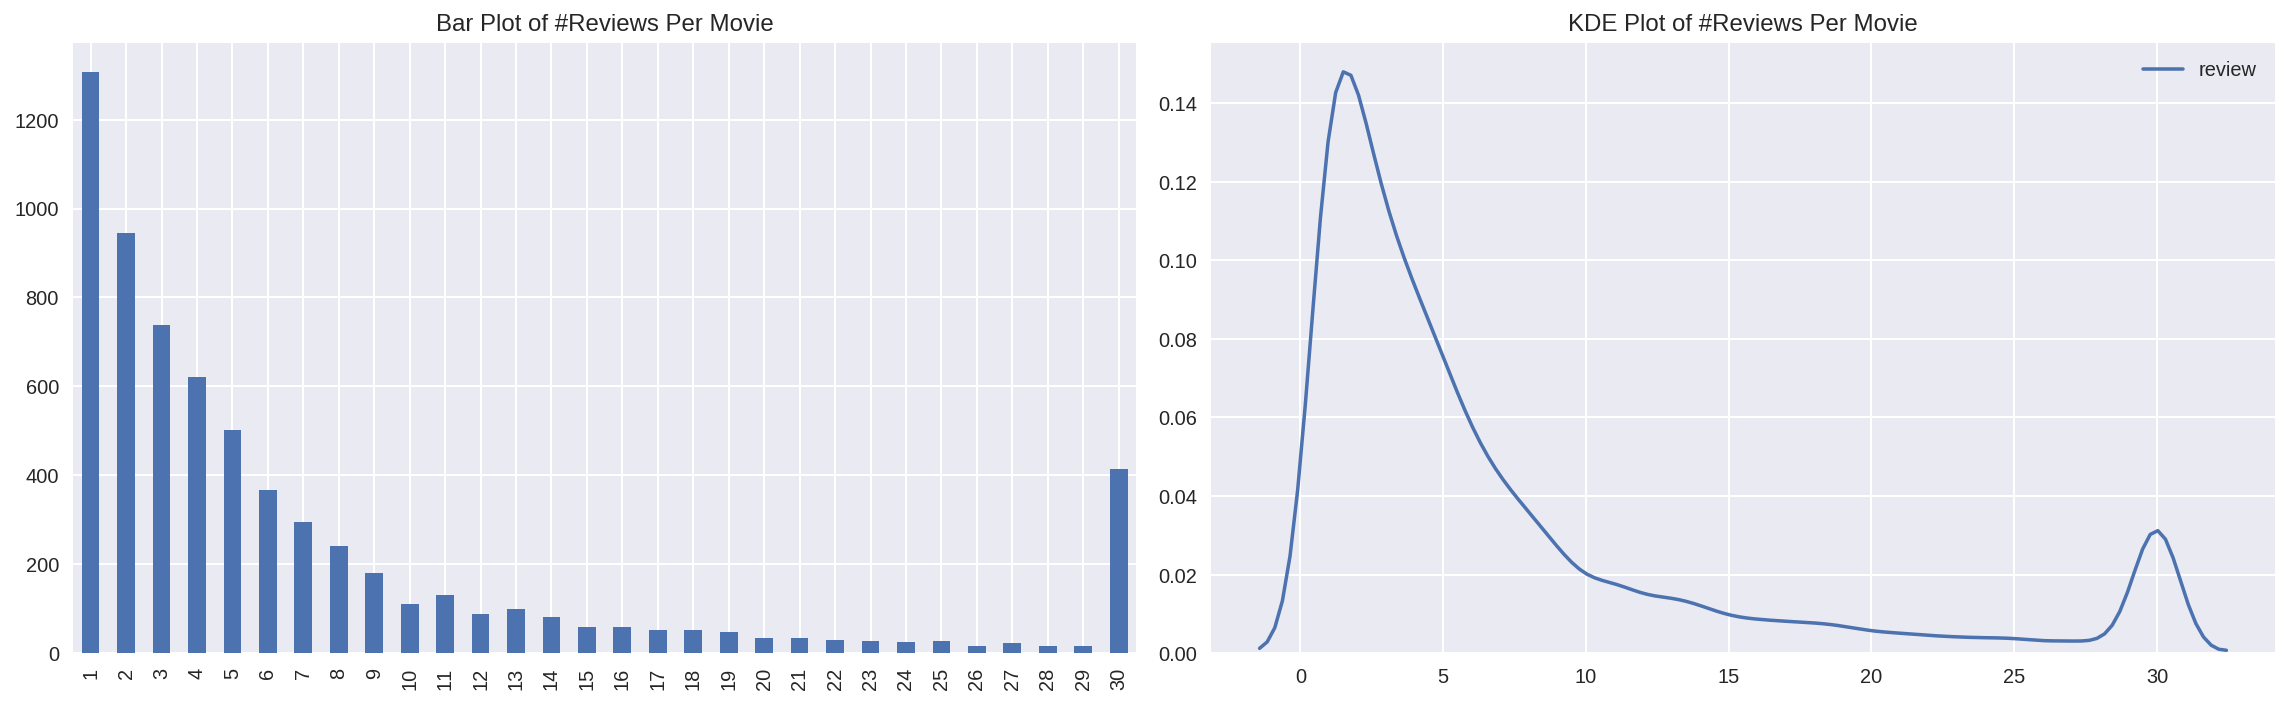

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

Most of the movies recieved only few reviews.

In [65]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

It looks like we have quite equal numbers of negative and positive reviews.

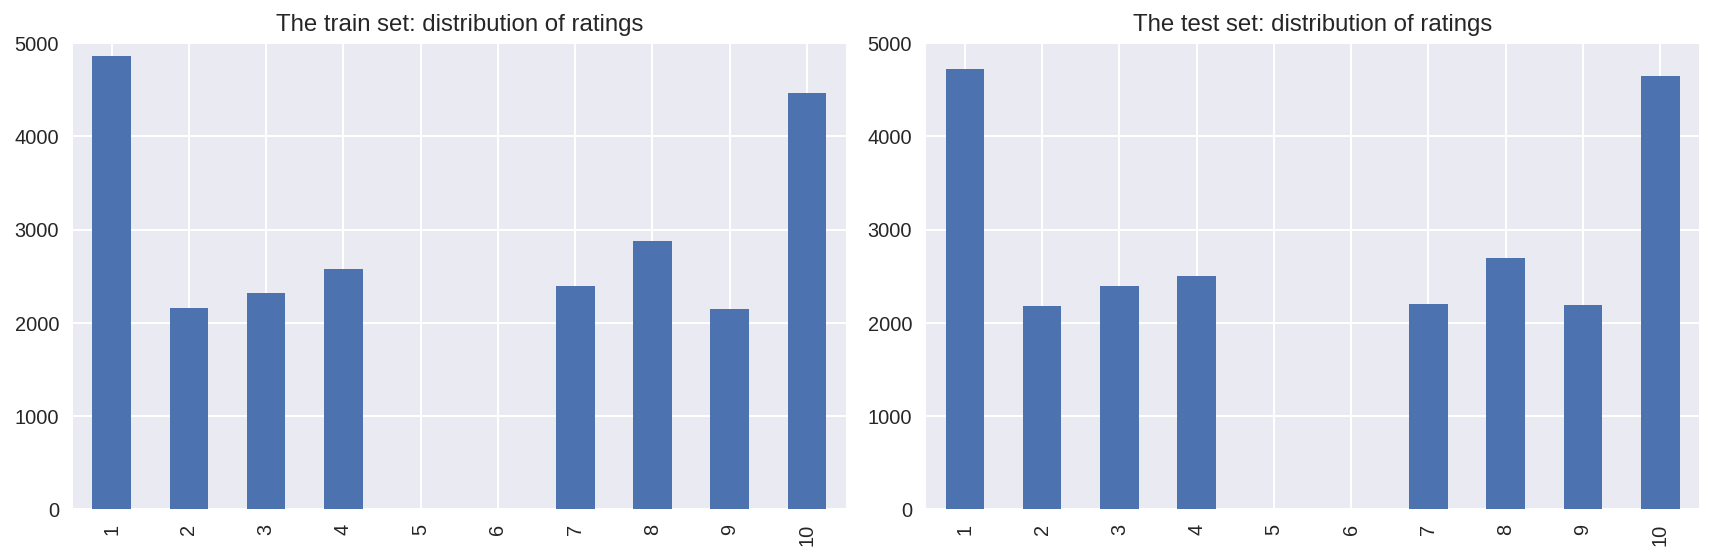

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

The distributions of ratings in the train and test datasets looks very similar.

Distribution of negative and positive reviews over the years for two parts of the dataset

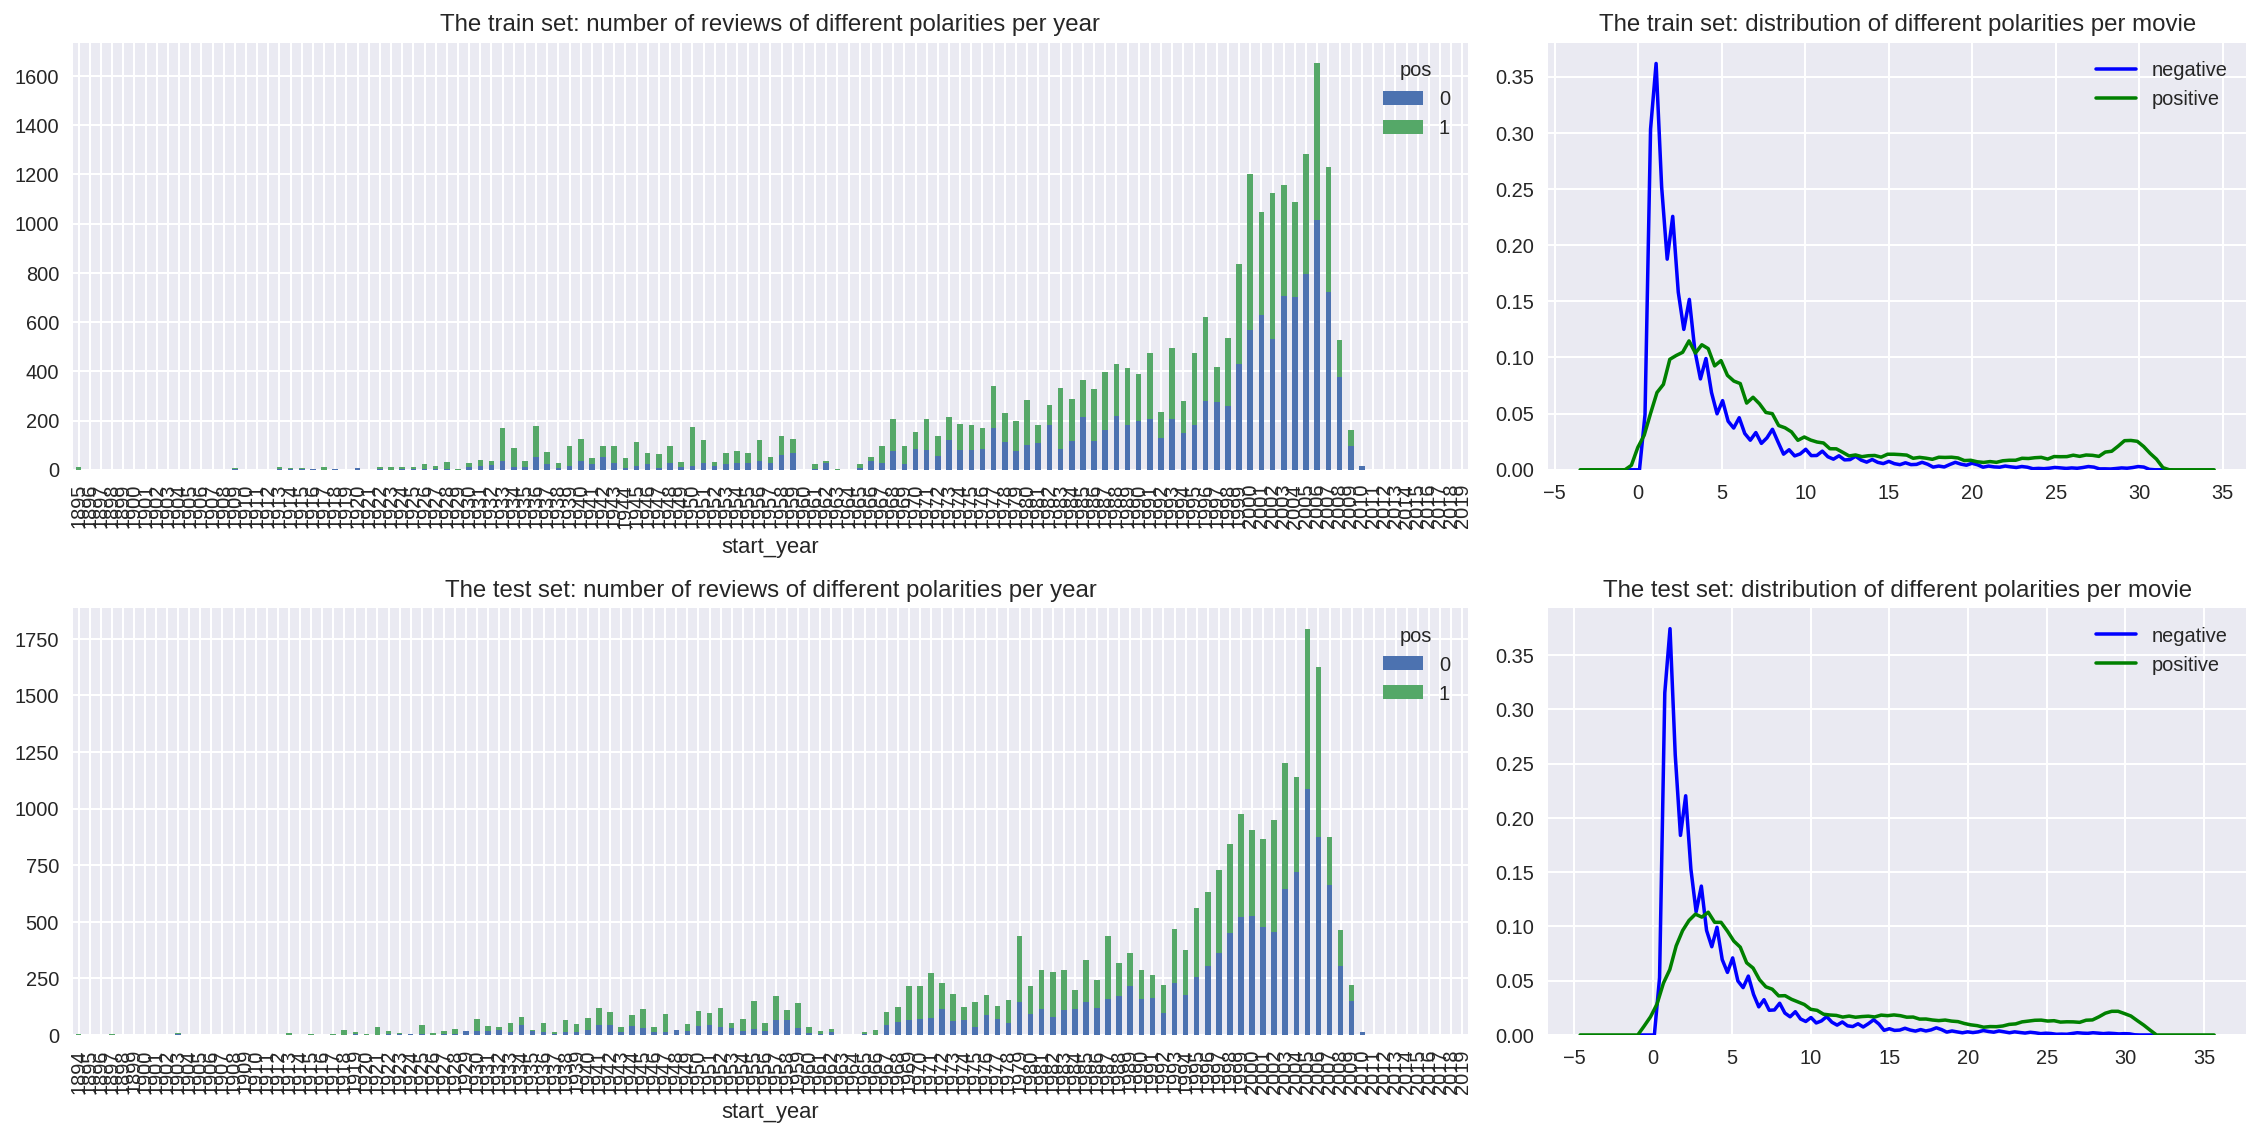

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

The distribution of negative and positive reviews over the years for two parts of the dataset looks similar.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Alright, you explored the data and made some interesting observations
	  
</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [68]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return df_eval_stats

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [69]:
df_reviews['review_norm'] = df_reviews.review.str.lower()

pattern = r"[^a-zA-Z']"
texts = []

for text in df_reviews.review_norm:
    text = re.sub(pattern, " ", text).split()
    text = " ".join(text)
    texts.append(text)
    
df_reviews['review_norm'] = pd.Series(texts)
df_reviews['review_norm'].head()

0    the pakage implies that warren beatty and gold...
1    how the hell did they get this made presenting...
2    there is no real story the film seems more lik...
3    um a serious film about troubled teens in sing...
4    i'm totally agree with garryjohal from singapo...
Name: review_norm, dtype: object

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Normalization looks good!
	  
</div>

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [70]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Working with models

### Model 0 - Constant

In [71]:
from sklearn.dummy import DummyClassifier

In [72]:
dummy_clf = DummyClassifier(strategy='constant', constant=1)
train_ones = np.zeros((df_reviews_train.shape[0],), dtype=int)
test_ones = np.zeros((df_reviews_test.shape[0],), dtype=int)
dummy_clf.fit(train_ones, train_target)

DummyClassifier(constant=1, random_state=None, strategy='constant')

          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
APS        0.50  0.50
ROC AUC    0.50  0.50


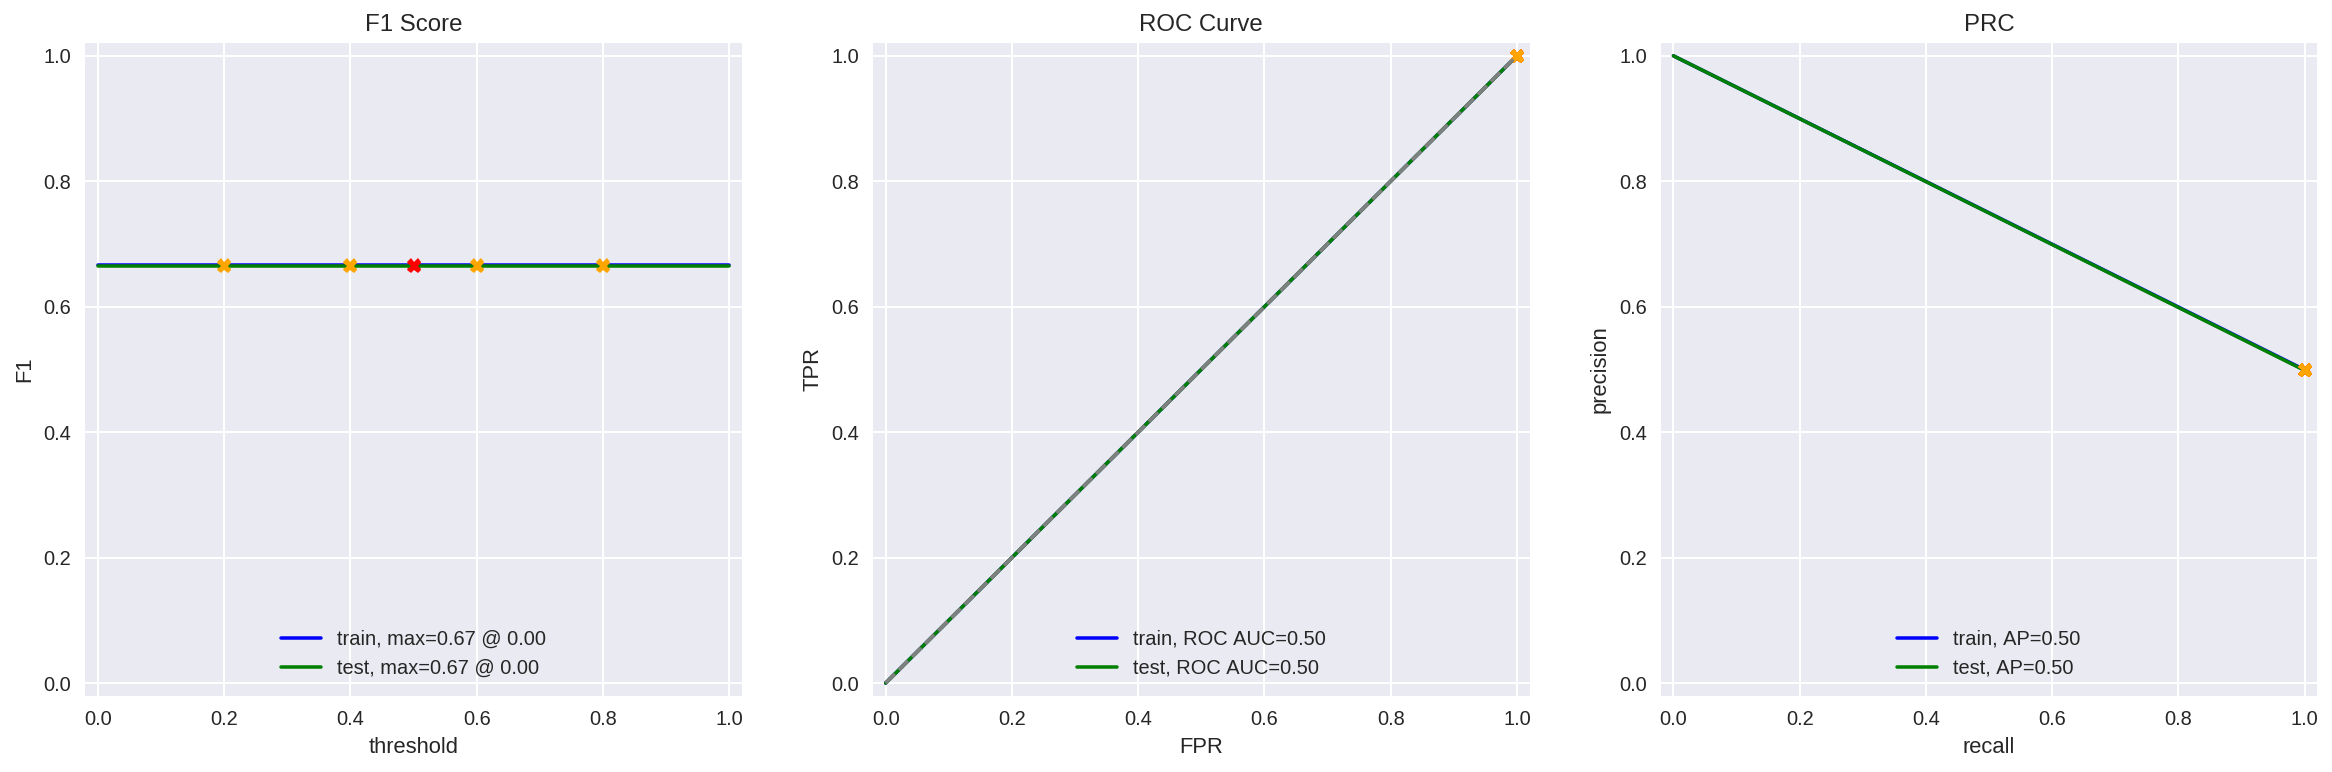

In [73]:
dummy_clf_scores = evaluate_model(dummy_clf, train_ones, train_target, test_ones, test_target)

F1 is not so bad for a dummy model, although the rest scores are 0.5 as we expected.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
There's a baseline!
	  
</div>

### Model 2 - NLTK, TF-IDF and LR

TF-IDF

In [74]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [75]:
stop_words = set(stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

In [76]:
train_corpus = df_reviews_train.review_norm
test_corpus = df_reviews_test.review_norm

tfidf_vectorizer_2 = count_tf_idf.fit(train_corpus)
train_tf_idf = tfidf_vectorizer_2.transform(train_corpus)
test_tf_idf = tfidf_vectorizer_2.transform(test_corpus)

model_2 = LogisticRegression().fit(train_tf_idf, train_target)

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


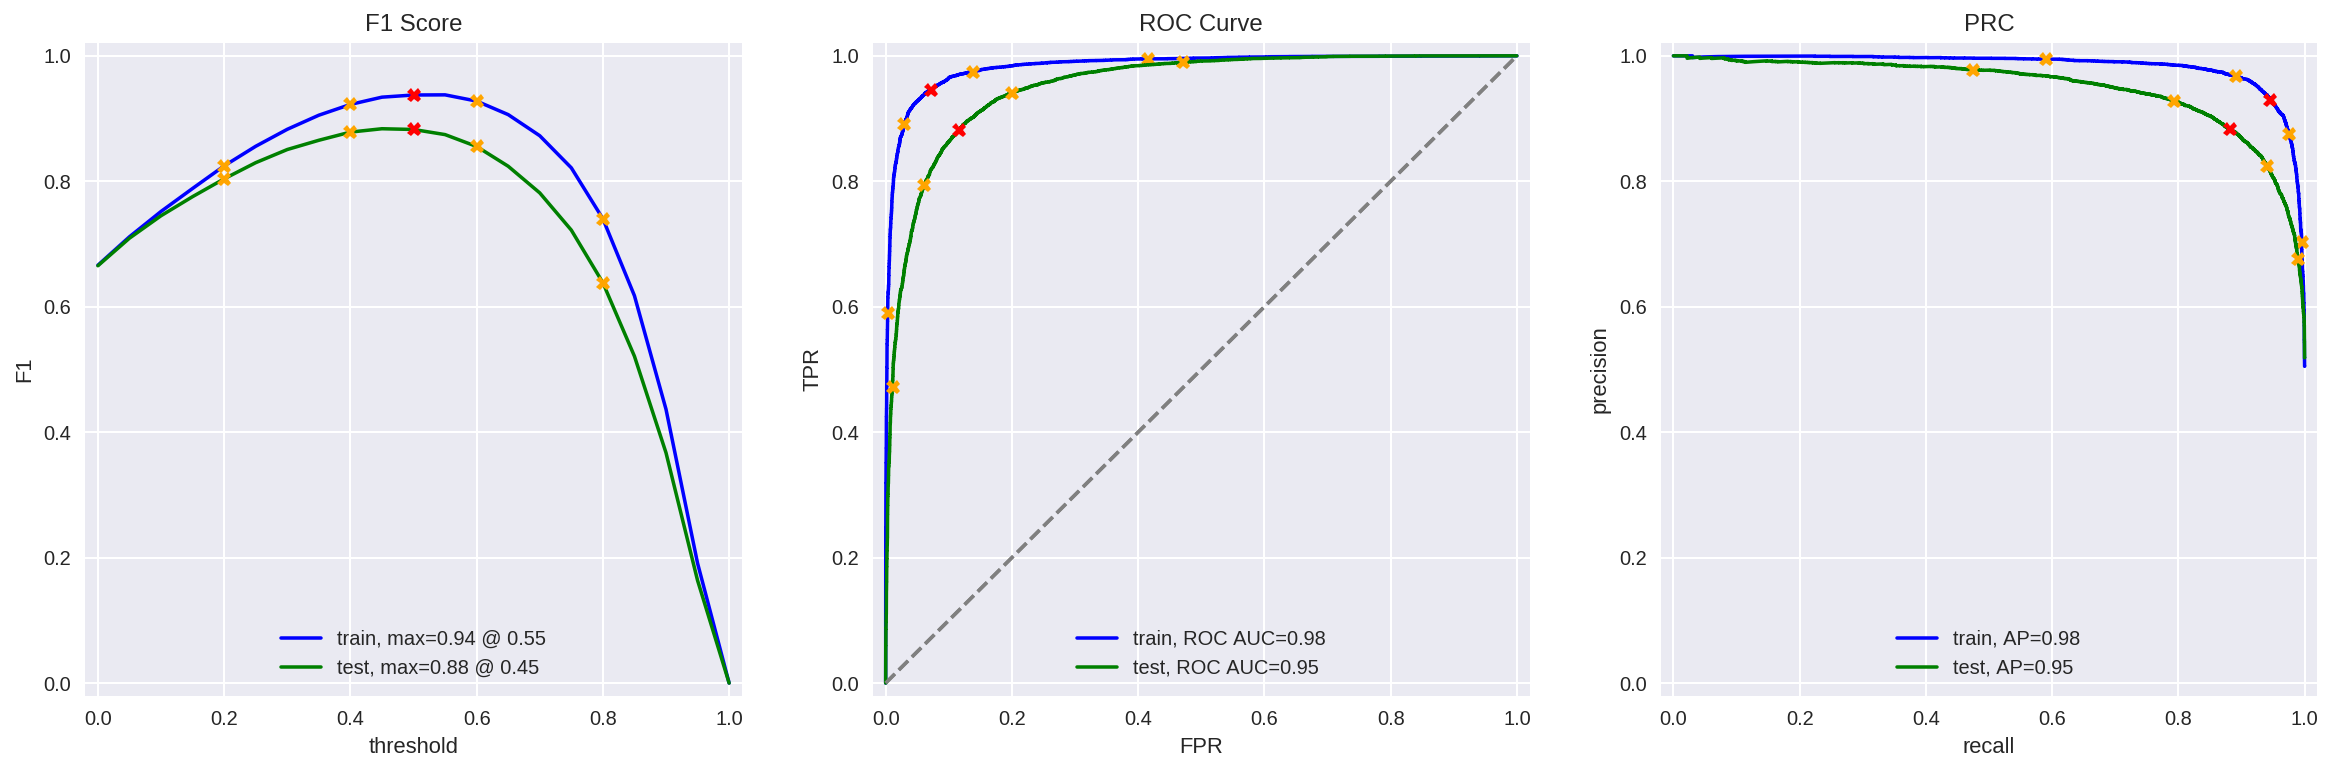

In [77]:
model_2_scores = evaluate_model(model_2, train_tf_idf, train_target, test_tf_idf, test_target)


We can see a significant improvement in comparison with the dummy model.

### Model 3 - spaCy, TF-IDF and LR

In [78]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [79]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [80]:
def Lemmatization(series):
    texts = []

    for text in series:
        text = text_preprocessing_3(text)
        texts.append(text)

    return  pd.Series(texts)

In [81]:
train_corpus = Lemmatization(df_reviews_train.review_norm)
test_corpus = Lemmatization(df_reviews_test.review_norm)

In [82]:
count_tf_idf_3 = TfidfVectorizer(stop_words=stop_words)
tfidf_vectorizer_3 = count_tf_idf_3.fit(train_corpus)
train_tf_idf = tfidf_vectorizer_3.transform(train_corpus)
test_tf_idf = tfidf_vectorizer_3.transform(test_corpus)

model_3 = LogisticRegression(random_state=0).fit(train_tf_idf, train_target)

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


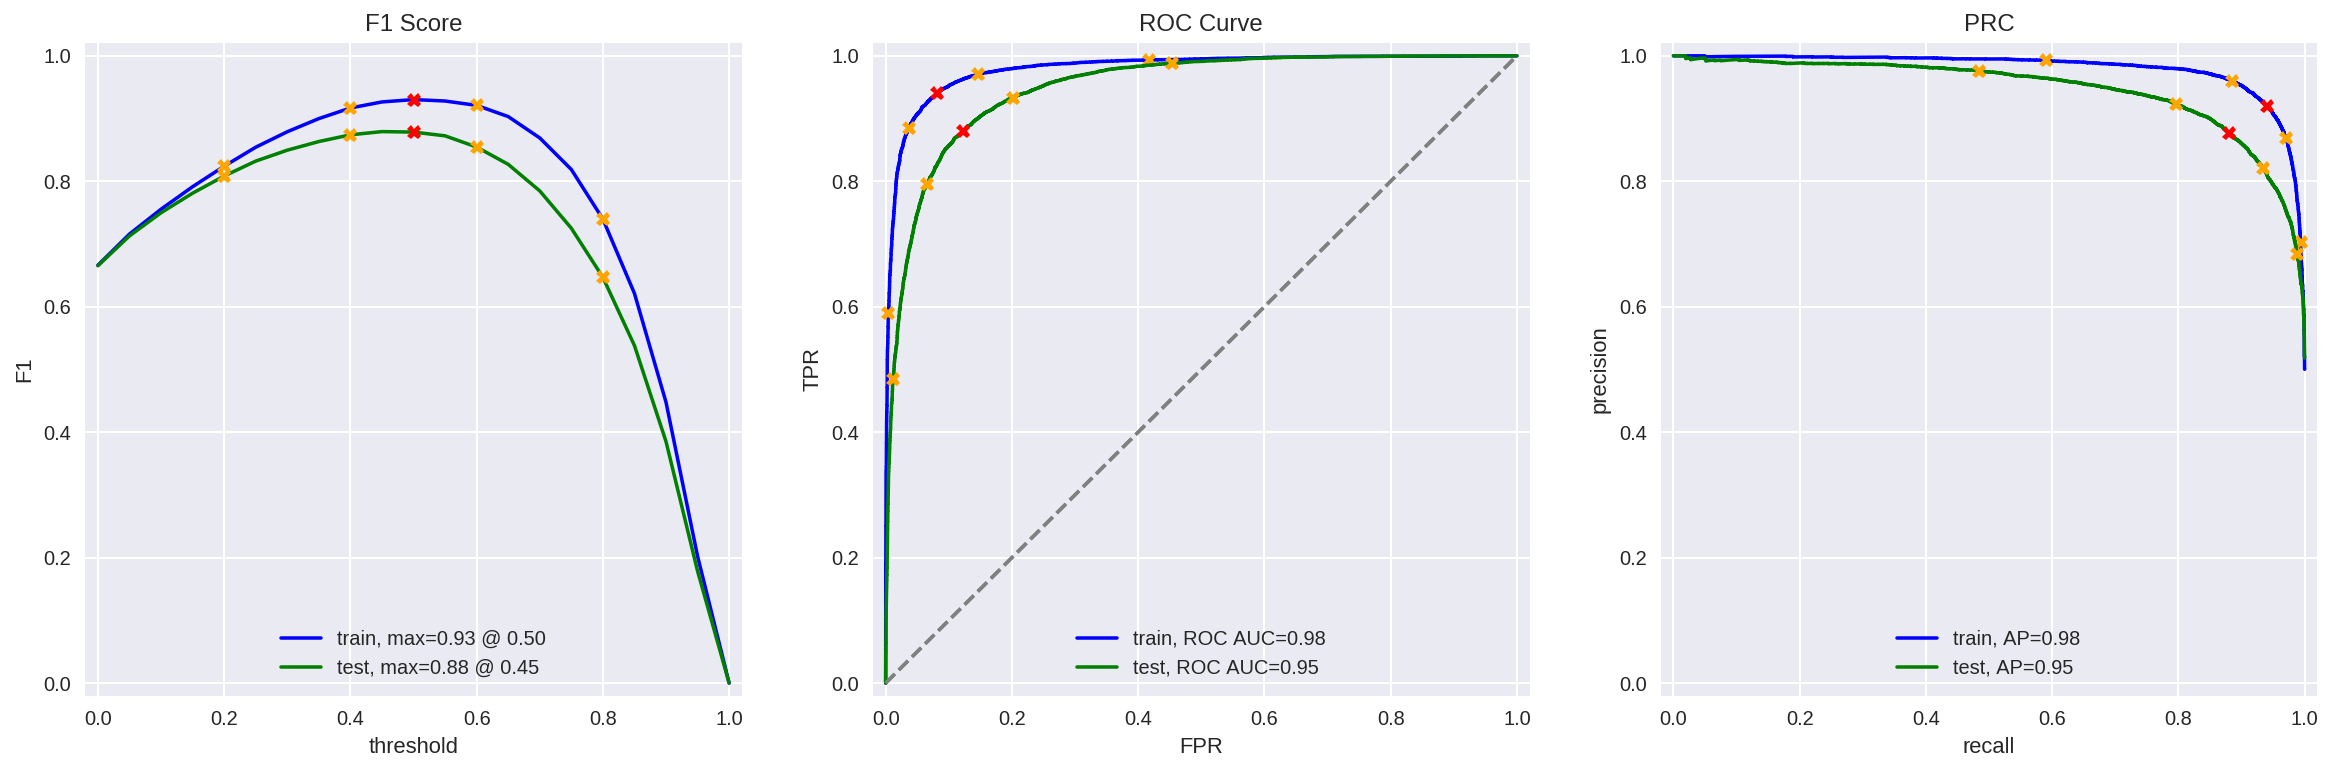

In [83]:
model_3_scores = evaluate_model(model_3, train_tf_idf, train_target, test_tf_idf, test_target)


The results here are very similar to the previous model.

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [84]:
import lightgbm as lgb

In [85]:
model_4 = lgb.LGBMClassifier()
model_4.fit(train_tf_idf, train_target)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

          train  test
Accuracy   0.91  0.86
F1         0.91  0.86
APS        0.97  0.93
ROC AUC    0.97  0.94


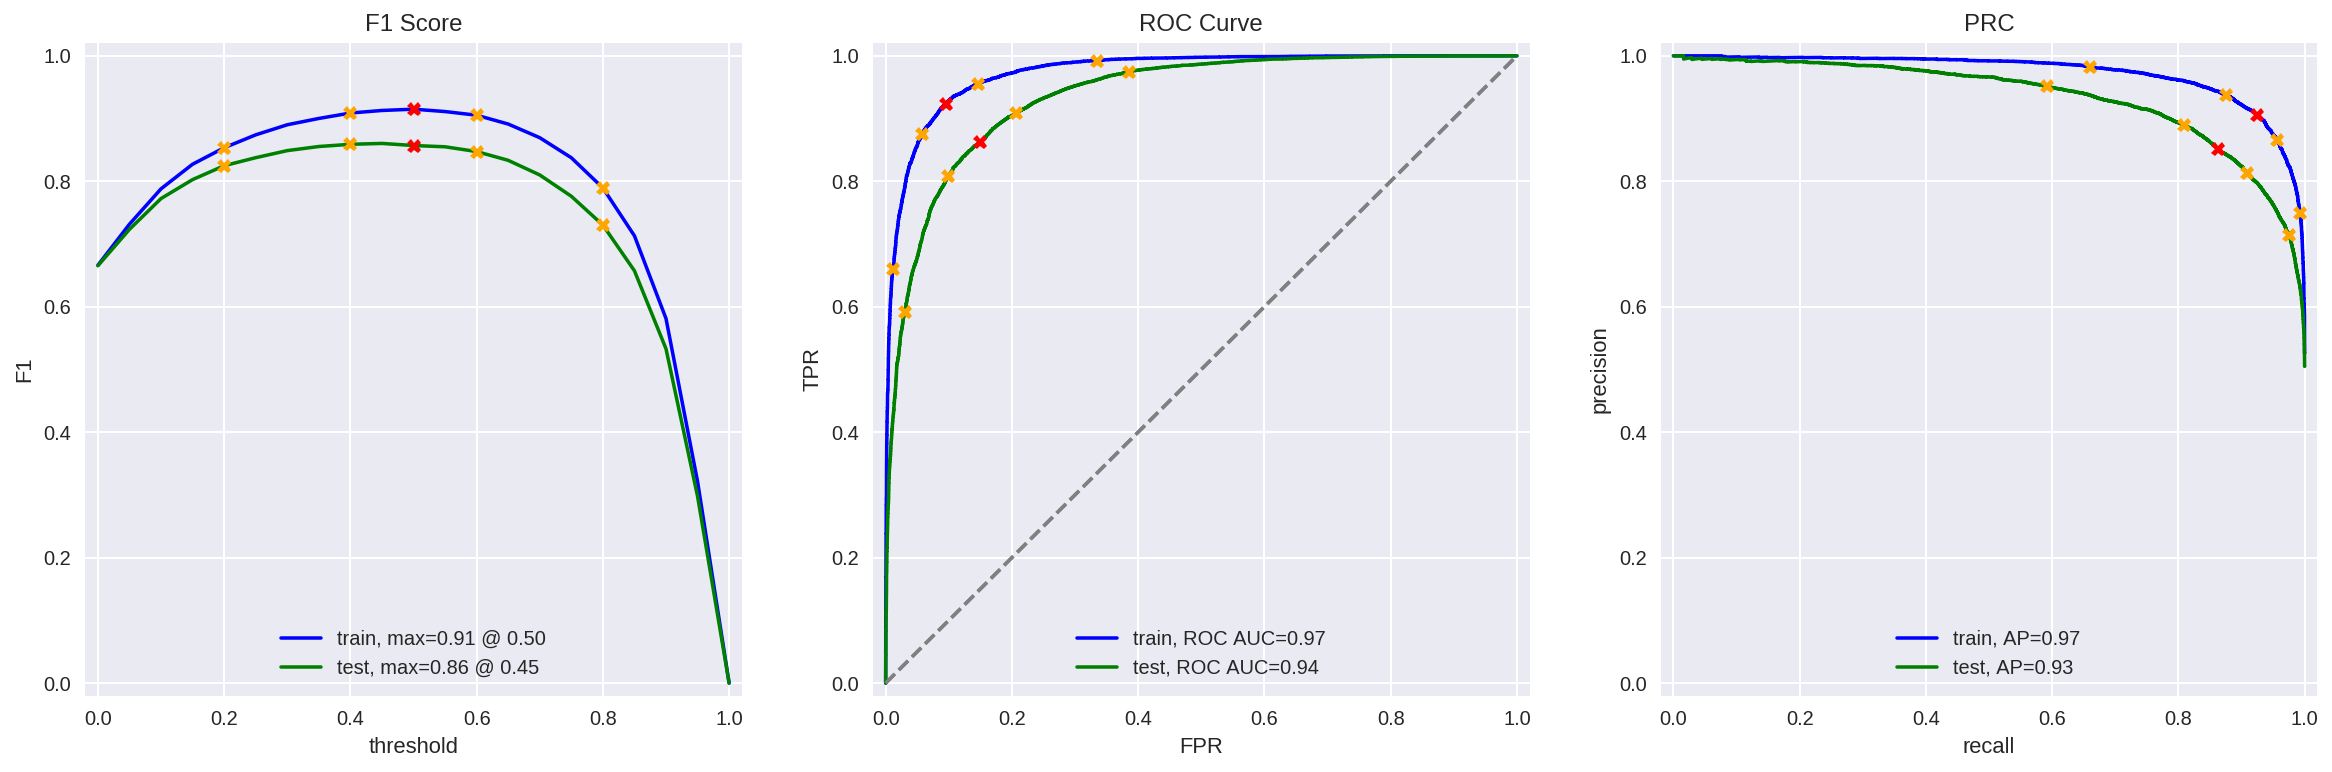

In [86]:
model_4_scores = evaluate_model(model_4, train_tf_idf, train_target, test_tf_idf, test_target)


Here again, we have very good scores.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The text was sucessfully vectorized with TF-IDF weighting, and you also tried lemmatization with spacy. There are a couple of different models trained with the resulting features. Well done!
	  
</div>

## My Reviews

In [40]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews.review.str.lower()

texts = []

for text in my_reviews.review_norm:
    text = re.sub(pattern, " ", text).split()
    text = " ".join(text)
    texts.append(text)
    
my_reviews['review_norm'] = pd.Series(texts)
my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn't expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


In [92]:
target_labels = [0, 0, 1, 0, 1, 1, 0, 1]

### Model 2

In [51]:
texts = my_reviews['review_norm']
x = tfidf_vectorizer_2.transform(texts)

my_reviews_pred_prob = model_2.predict_proba(x)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

array([0.137394  , 0.15835608, 0.53511316, 0.11148814, 0.30590505,
       0.47058464, 0.03650889, 0.82282572])

0.14:  i did not simply like it not my kind of movie
0.16:  well i was bored and felt asleep in the middle of the movie
0.54:  i was really fascinated with the movie
0.11:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.31:  i didn't expect the reboot to be so good writers really cared about the source material
0.47:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.82:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


In [93]:
model2_labels = [0, 0, 1, 0, 0, 0, 0, 1]

In [101]:
round(metrics.f1_score(target_labels, model2_labels), 2)

0.67

### Model 3

In [42]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.27:  i did not simply like it not my kind of movie
0.08:  well i was bored and felt asleep in the middle of the movie
0.44:  i was really fascinated with the movie
0.11:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.24:  i didn't expect the reboot to be so good writers really cared about the source material
0.54:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.02:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.91:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


In [95]:
model3_labels = [0, 0, 0, 0, 0, 1, 0, 1]

In [100]:
round(metrics.f1_score(target_labels, model3_labels), 2)

0.67

### Model 4

In [43]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.63:  i did not simply like it not my kind of movie
0.18:  well i was bored and felt asleep in the middle of the movie
0.60:  i was really fascinated with the movie
0.36:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.66:  i didn't expect the reboot to be so good writers really cared about the source material
0.68:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.26:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.75:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


In [97]:
model4_labels = [1, 0, 1, 0, 1, 1, 0, 1]

In [99]:
round(metrics.f1_score(target_labels, model4_labels), 2)

0.89

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The models were applied to custom reviews correctly
	  
</div>

## Conclusions

In [111]:
print('Dummy model:\n', dummy_clf_scores.loc['F1'], 
'\n\nModel 2:\n', model_2_scores.loc['F1'], 
'\n\nModel 3:\n', model_3_scores.loc['F1'], 
'\n\nModel 4:\n', model_4_scores.loc['F1'])

Dummy model:
 train    0.67
test     0.67
Name: F1, dtype: float64 

Model 2:
 train    0.94
test     0.88
Name: F1, dtype: float64 

Model 3:
 train    0.93
test     0.88
Name: F1, dtype: float64 

Model 4:
 train    0.91
test     0.86
Name: F1, dtype: float64


Except of the dummy model, all the models have F1 score above 0.85 . 

According to the train/test F1 scores, models 2 & 3 did better than model 4.

According to the reviews F1 scores, model 4 is the best model.


<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Note that the section with custom reviews is for illustration purposes only. Making any conclusions based on a tiny test set of 8 reviews makes no sense when we have a much more representative test set consisting of thousands of reviews
	  
</div>

# Checklist

- [x]  Notebook was opened
- [ ]  The text data is loaded and pre-processed for vectorization
- [ ]  The text data is transformed to vectors
- [ ]  Models are trained and tested
- [ ]  The metric's threshold is reached
- [ ]  All the code cells are arranged in the order of their execution
- [ ]  All the code cells can be executed without errors
- [ ]  There are conclusions